## API –– Reddit

1. Регистрируемся на сайте https://www.reddit.com/
2. Идем по этой ссылке: https://www.reddit.com/prefs/apps
3. Cоздаем приложение: указываем название
4. Создаем приложение: указываем такой redirect url – http://www.example.com/unused/redirect/uri

In [1]:
!pip install praw

In [2]:
!pip install fake_useragent

In [3]:
import praw
import time
from fake_useragent import UserAgent
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd
import datetime
import json

In [4]:
reddit = praw.Reddit(
    client_id="NivQGBUk9LshN3rW2oy6gg",
    client_secret="yZ18kkGRZVA9sStGhK1aaV9TlaWSdg",
    user_agent=UserAgent().chrome,
)

In [5]:
print(reddit.read_only)

True


In [6]:
data = []
for submission in tqdm(reddit.subreddit("cscareerquestions").hot(limit=100)):
    data.append(
                {'title': submission.title,
            'score': submission.score,
            'url': submission.url,
            'awards': submission.all_awardings,
            'upvote_ratio': submission.upvote_ratio,
            "timestamp": submission.created,
            'text': submission.selftext}
    )

0it [00:00, ?it/s]

In [7]:
len(data)

100

In [8]:
df = pd.DataFrame(data)
df.head()

title  score  \
0   Big N Discussion - June 15, 2022      3   
1  Daily Chat Thread - June 15, 2022      2   
2                      I got the job    624   
3     Coinbase Announces 18% Layoffs   1472   
4      How are people making $200k+?    186   

                                                 url  \
0  https://www.reddit.com/r/cscareerquestions/com...   
1  https://www.reddit.com/r/cscareerquestions/com...   
2  https://www.reddit.com/r/cscareerquestions/com...   
3  https://www.reddit.com/r/cscareerquestions/com...   
4  https://www.reddit.com/r/cscareerquestions/com...   

                                              awards  upvote_ratio  \
0                                                 []          1.00   
1                                                 []          1.00   
2  [{'giver_coin_reward': None, 'subreddit_id': N...          0.94   
3                                                 []          0.95   
4                                                 []          0.88   

      timestamp                                               text  
0  1.655276e+09  Please use this thread to have discussions abo...  
1  1.655277e+09  Please use this thread to chat, have casual di...  
2  1.655257e+09  I graduated Dec 2020 from a no-name state scho...  
3  1.655217e+09  Source: https://blog.coinbase.com/a-message-fr...  
4  1.655253e+09  How are people making so much money up to even...

In [9]:
df.iloc[1]['url']

'https://www.reddit.com/r/cscareerquestions/comments/vcoj7a/daily_chat_thread_june_15_2022/'

In [10]:
df.to_csv('reddit_cscareer.csv', index=False)

In [11]:
df.iloc[2]

title                                               I got the job
score                                                         624
url             https://www.reddit.com/r/cscareerquestions/com...
awards          [{'giver_coin_reward': None, 'subreddit_id': N...
upvote_ratio                                                 0.94
timestamp                                            1655256587.0
text            I graduated Dec 2020 from a no-name state scho...
Name: 2, dtype: object

## API – Genius

In [1]:
import sys
import re
#import urllib
import urllib.request as urllib
from bs4 import BeautifulSoup
import json
import csv
import codecs
import os
import socket
from socket import AF_INET, SOCK_DGRAM
import requests



- [getting started](https://docs.genius.com/#/getting-started-h1)
- [search](https://docs.genius.com/#search-h2)

In [37]:
client_access_token = 'EeInQQqMKUGMuN-Kk-UAVkNAuGoOv9-Bj2WKRw7EjHjWyIdjpRtBoBykDWYaTpV4'

In [2]:
client_access_token = 'ORA9OCGGOuRrobKXoXVeAhywqKa9Go89p37Z4cOTEjCHPxgkrs4BQr3I-dB7RyV2'


In [38]:
search_term = 'меладз паралелл'

In [41]:
urllib.quote(search_term)

'%D0%BC%D0%B5%D0%BB%D0%B0%D0%B4%D0%B7%20%D0%BF%D0%B0%D1%80%D0%B0%D0%BB%D0%B5%D0%BB%D0%BB'

In [42]:
f"http://api.genius.com/search?q={urllib.quote(search_term)}"

'http://api.genius.com/search?q=%D0%BC%D0%B5%D0%BB%D0%B0%D0%B4%D0%B7%20%D0%BF%D0%B0%D1%80%D0%B0%D0%BB%D0%B5%D0%BB%D0%BB'

In [43]:
'aaa{}'.format('1')

'aaa1'

In [44]:
a = 1
f"aaa{a}"

'aaa1'

In [8]:
url2 = "http://api.genius.com/search?q=меладз%20паралелл"

In [9]:
url3 = "https://api.genius.com/songs/1696709"

In [45]:
querystring = f"http://api.genius.com/search?q={urllib.quote(search_term)}"

In [11]:
r = requests.get(url2, headers={'Authorization': "Bearer " + client_access_token})

In [12]:
r.json()['response']['hits'][0]

{'highlights': [],
 'index': 'song',
 'type': 'song',
 'result': {'annotation_count': 0,
  'api_path': '/songs/5310426',
  'artist_names': 'Валерий Меладзе (Valery Meladze)',
  'full_title': 'Параллельные (Parallel) by\xa0Валерий\xa0Меладзе (Valery Meladze)',
  'header_image_thumbnail_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.300x300x1.jpg',
  'header_image_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.600x600x1.jpg',
  'id': 5310426,
  'lyrics_owner_id': 4295053,
  'lyrics_state': 'complete',
  'path': '/Valery-meladze-parallel-lyrics',
  'pyongs_count': None,
  'relationships_index_url': 'https://genius.com/Valery-meladze-parallel-sample',
  'release_date_components': {'year': 2008, 'month': None, 'day': None},
  'release_date_for_display': '2008',
  'song_art_image_thumbnail_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.300x300x1.jpg',
  'song_art_image_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.6

In [13]:
request = urllib.Request(querystring)
request.add_header("Authorization", "Bearer " + client_access_token)
request.add_header(
    "User-Agent",
    "curl/7.9.8 (i686-pc-linux-gnu) libcurl 7.9.8 (OpenSSL 0.9.6b) (ipv6 enabled)"
)  #Must include user agent of some sort, otherwise 403 returned

In [14]:
response = urllib.urlopen(
    request, timeout=4
)  #timeout set to 4 seconds; automatically retries if times out
raw = response.read()
json_obj = json.loads(raw)

In [15]:
json_obj["response"]['hits'][0]['result']

{'annotation_count': 0,
 'api_path': '/songs/5310426',
 'artist_names': 'Валерий Меладзе (Valery Meladze)',
 'full_title': 'Параллельные (Parallel) by\xa0Валерий\xa0Меладзе (Valery Meladze)',
 'header_image_thumbnail_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.300x300x1.jpg',
 'header_image_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.600x600x1.jpg',
 'id': 5310426,
 'lyrics_owner_id': 4295053,
 'lyrics_state': 'complete',
 'path': '/Valery-meladze-parallel-lyrics',
 'pyongs_count': None,
 'relationships_index_url': 'https://genius.com/Valery-meladze-parallel-sample',
 'release_date_components': {'year': 2008, 'month': None, 'day': None},
 'release_date_for_display': '2008',
 'song_art_image_thumbnail_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.300x300x1.jpg',
 'song_art_image_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.600x600x1.jpg',
 'stats': {'unreviewed_annotations': 0, 'hot': False},
 'title': 

In [16]:
r.json()['response']['hits'][0]['result']['url']

'https://genius.com/Valery-meladze-parallel-lyrics'

In [17]:
primary_artist = json_obj["response"]['hits'][0]['result']['primary_artist']['name']
primary_artist

'Валерий Меладзе (Valery Meladze)'

In [18]:
primary_title = json_obj["response"]['hits'][0]['result']['title']
primary_title

'Параллельные (Parallel)'

In [19]:
url_lyrics = json_obj["response"]['hits'][0]['result']['url']
url_lyrics

'https://genius.com/Valery-meladze-parallel-lyrics'

In [20]:
json_obj

{'meta': {'status': 200},
 'response': {'hits': [{'highlights': [],
    'index': 'song',
    'type': 'song',
    'result': {'annotation_count': 0,
     'api_path': '/songs/5310426',
     'artist_names': 'Валерий Меладзе (Valery Meladze)',
     'full_title': 'Параллельные (Parallel) by\xa0Валерий\xa0Меладзе (Valery Meladze)',
     'header_image_thumbnail_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.300x300x1.jpg',
     'header_image_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.600x600x1.jpg',
     'id': 5310426,
     'lyrics_owner_id': 4295053,
     'lyrics_state': 'complete',
     'path': '/Valery-meladze-parallel-lyrics',
     'pyongs_count': None,
     'relationships_index_url': 'https://genius.com/Valery-meladze-parallel-sample',
     'release_date_components': {'year': 2008, 'month': None, 'day': None},
     'release_date_for_display': '2008',
     'song_art_image_thumbnail_url': 'https://images.genius.com/9f534dc01f03cfa2e1308b0e23229652.3

In [21]:
page = requests.get('https://genius.com/Valery-meladze-parallel-lyrics?react=1',  stream=True)
page.encoding = 'utf-8'
html = BeautifulSoup(page.text, 'html')
#a = html.find_all('div', {'class':"Lyrics__Container-sc-1ynbvzw-6 jYfhrf"})

In [24]:
a

1

## API – Spotify

– Регистрируемся: www.spotify.com

– Получаем ключи: https://developer.spotify.com/dashboard/applications

– Документация: https://spotipy.readthedocs.io/en/2.18.0/

In [53]:
!pip install spotipy

In [54]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from IPython import display as ipd
from PIL import Image
import requests

In [55]:
client_id = '7efce63d50294a5993ef2c02cc437bdd'
client_secret = '9d64acd500d74021949f4d14c3b29c79'

In [56]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id=client_id, 
    client_secret=client_secret))



In [57]:
search_term = 'меладзе параллельные'

In [58]:
search = spotify.search(search_term, limit=1, type='track')

In [59]:
search['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [60]:
name = search['tracks']['items'][0]['album']['artists'][0]['name']
title = search['tracks']['items'][0]['name']
preview_url = search['tracks']['items'][0]['preview_url']
spotify_url = search['tracks']['items'][0]['external_urls']['spotify']
img_url = search['tracks']['items'][0]['album']['images'][0]['url']
href = search['tracks']['items'][0]['href']

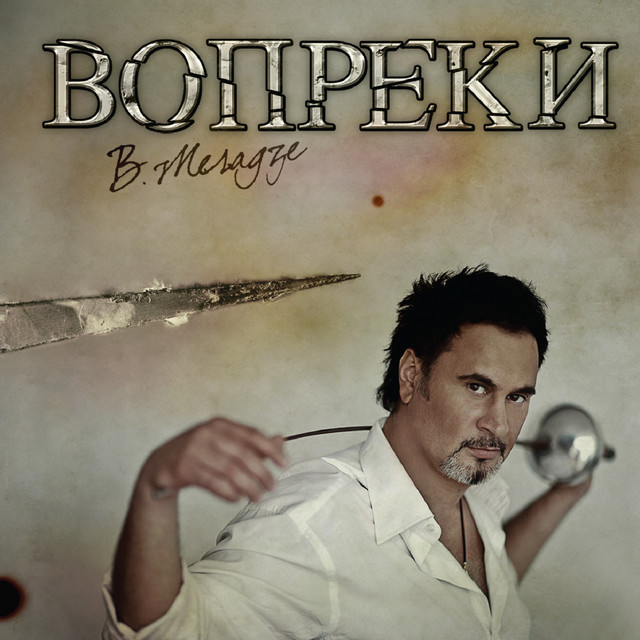

In [61]:
display(Image.open(requests.get(img_url, stream=True).raw))

In [62]:
display(ipd.Markdown(f'check full track [here]({spotify_url}) or preview below'))
ipd.display(ipd.Audio(url=preview_url+'.mp3'))

check full track [here](https://open.spotify.com/track/247V4x1aRJzZLXlQxAfWAF) or preview below

## API – Wikipedia

Здесь, как и в случае с praw для Reddit, мы используем обертку для обращения к API. 

Описание проекта: https://pypi.org/project/wikipedia/

Документация: https://wikipedia.readthedocs.io/en/latest/code.html#api

In [26]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11686 sha256=fc429b1cbc8aa3013b7c80559ef7ad5fa1cad6b5c1ecdd483f0e9ddd23dd6983
  Stored in directory: /Users/maksimkarpov/Library/Caches/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


In [27]:
import wikipedia

In [28]:
wikipedia.search("Меладзе")

['Konstantin Meladze',
 'Valery Meladze',
 'MBAND',
 'Nu Virgos',
 'Vladislav Ramm',
 'Dima Bilan',
 'Ukraine in the Eurovision Song Contest 2016',
 'Tatiana Naynik',
 'Yin-Yang (group)',
 'Tatiana Kotova']

In [29]:
vm = wikipedia.page('Valery Meladze')

In [30]:
vm

<WikipediaPage 'Valery Meladze'>

In [31]:
vm.title

'Valery Meladze'

In [32]:
vm.content

'Valerian Shotayevich Meladze(born 23 June 1965), known professionally as Valery Meladze, is a Soviet and Russian singer of Georgian descent and a Meritorious Artist of Russia. He is the brother of composer and producer Konstantin Meladze, who writes songs for him.\n\n\n== Biography ==\n\n\n=== Early life ===\nValeriy Meladze was born on 23 June 1965 in Batumi in the family of Shota and Nelly Meladze, who were engineers. Valeriy has a brother, Konstantin (1963), and a sister, Liana (1968). He was an impatient and disobedient child, while his brother was very quiet. He went to music school and learned to play the piano. In school he did not study well. Since his parents, his grandmother and his grandfather were engineers, he decided to enter the Engineering Institute. Meladze entered the Nikolayev Shipbuilding Institute in Ukraine to study mechanical engineering of ship power plants. In 1985, Valeriy\'s brother started playing keyboard in the group "April". After some time, Valeriy star

In [33]:
vm.summary

'Valerian Shotayevich Meladze(born 23 June 1965), known professionally as Valery Meladze, is a Soviet and Russian singer of Georgian descent and a Meritorious Artist of Russia. He is the brother of composer and producer Konstantin Meladze, who writes songs for him.\n\n'

## Задание



In [34]:
lat = 55.7546 # широта
long = 37.64875  # долгота

1. Установите язык Википедии на русский
2. Воспользуйтесь поиском по геолокации для координат выше. Достаньте первые 20 результатов
3. Достаньте страницу для 16 результата поиска
4. Достаньте url страницы
5. Достаньте краткое содеражние страницы
6. Сколько на странице ссылок? (22)
7. Сколько на странице ссылок на изображения? (4)

In [71]:
!pip install wikipedia

In [35]:
wikipedia.set_lang('ru')

In [36]:
wikipedia.geosearch(lat, long, results=20)

['Усадьба Дурасовых',
 'Покровский бульвар',
 'Посольство Ирана в России',
 'Дурасовский переулок',
 'Таганская автоматическая телефонная станция',
 'Военный институт (инженерных войск) Общевойсковой академии Вооружённых Сил Российской Федерации',
 'Городская усадьба Вандышниковой — Банза',
 'Московская центральная церковь евангельских христиан-баптистов',
 'Московский институт электроники и математики',
 'Евангелическо-реформатская церковь (Москва)',
 'Школа в Большом Трёхсвятительском переулке',
 'Усадьба Латышевых — Бахрушиных — Бардыгиных',
 'Дом Телешова',
 'Милютинский сад',
 'Дом Остермана',
 'Мясницкая полицейская часть',
 'Малый Трёхсвятительский переулок',
 'Дом-мастерская художника И. И. Левитана',
 'Улица Воронцово Поле',
 'Казарменный переулок (Москва)']